In [1]:
from sklearn.svm import SVR
model=SVR(kernel='poly')


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarning('ignore')


AttributeError: module 'warnings' has no attribute 'filterwarning'

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('breast-cancer-wisconsin.csv', encoding='utf-8')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   code                         683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Cell_Size                    683 non-null    int64
 3   Cell_Shape                   683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [5]:
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [6]:
data[['Class']].value_counts()

Class
0        444
1        239
dtype: int64

In [7]:
X=data[data.columns[1:9]]
y=data[['Class']]


In [8]:
pd.shape(X)

AttributeError: module 'pandas' has no attribute 'shape'

In [9]:
shape(X)

NameError: name 'shape' is not defined

In [10]:
X.shape()

TypeError: 'tuple' object is not callable

array([[<AxesSubplot:title={'center':'code'}>,
        <AxesSubplot:title={'center':'Clump_Thickness'}>,
        <AxesSubplot:title={'center':'Cell_Size'}>],
       [<AxesSubplot:title={'center':'Cell_Shape'}>,
        <AxesSubplot:title={'center':'Marginal_Adhesion'}>,
        <AxesSubplot:title={'center':'Single_Epithelial_Cell_Size'}>],
       [<AxesSubplot:title={'center':'Bare_Nuclei'}>,
        <AxesSubplot:title={'center':'Bland_Chromatin'}>,
        <AxesSubplot:title={'center':'Normal_Nucleoli'}>],
       [<AxesSubplot:title={'center':'Mitoses'}>,
        <AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>]],
      dtype=object)

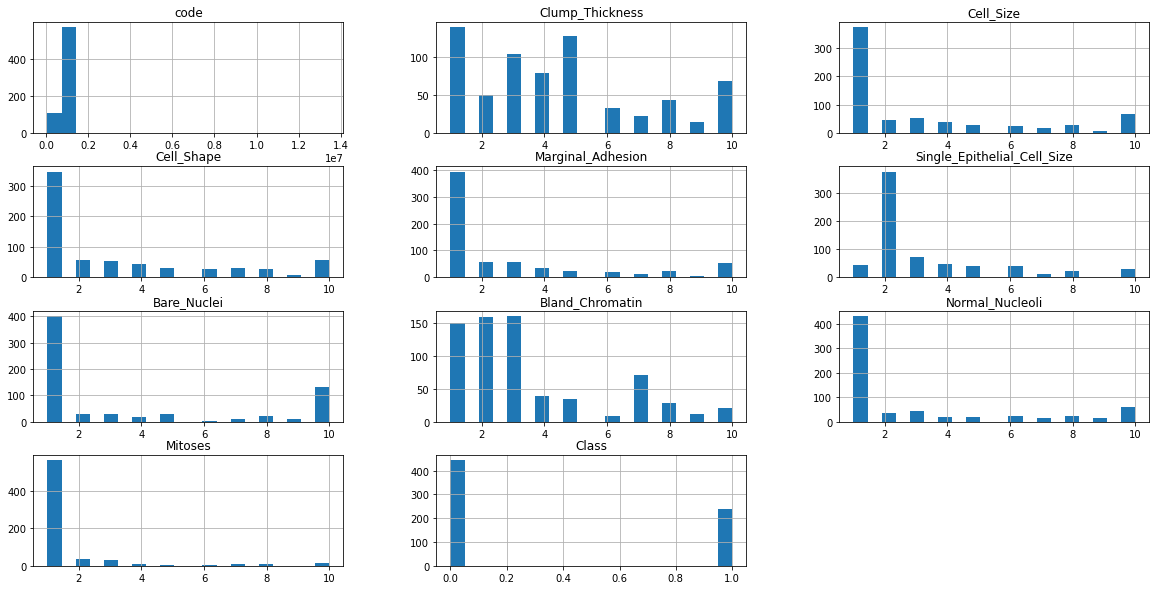

In [11]:
data.hist(bins=20, figsize=(20,10))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, stratify=y, random_state=42)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [14]:
pd.DataFrame(X_scaled_train).describe()

,0,1,2,3,4,5,6,7
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
pd.DataFrame(X_scaled_test).describe()

,0,1,2,3,4,5,6,7
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.411306,0.259909,0.256010,0.198181,0.269006,0.274204,0.278752,0.233918
std,0.298847,0.357544,0.332700,0.315307,0.259557,0.405891,0.292578,0.360958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000
50%,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.388889,0.444444,0.444444,0.388889
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
from sklearn.svm import SVR
model=SVR(kernel='poly')
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_trian)


NameError: name 'y_trian' is not defined

In [17]:
from sklearn.svm import SVR
model=SVR(kernel='poly')
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.8760719457574562